In [48]:
!pip install tensorflow

In [49]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [50]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [51]:
NUM_CLASSES = 9

# 学習データ読み込み

In [52]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [53]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [56]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [57]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [58]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [59]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
21/37 [================>.............] - ETA: 0s - loss: 2.1469 - accuracy: 0.1615 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 2s 20ms/step - loss: 2.0811 - accuracy: 0.1902 - val_loss: 1.9509 - val_accuracy: 0.2228
Epoch 2/1000
35/37 [===========================>..] - ETA: 0s - loss: 1.9592 - accuracy: 0.2326
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 9ms/step - loss: 1.9588 - accuracy: 0.2340 - val_loss: 1.8754 - val_accuracy: 0.2447
Epoch 3/1000
19/37 [==============>...............] - ETA: 0s - loss: 1.8935 - accuracy: 0.2467
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 8ms/step - loss: 1.8812 - accuracy: 0.2552 - val_loss: 1.8099 - val_accuracy: 0.2730
Epoch 4/1000
18/37 [=============>................] - ETA: 0s - loss: 1.8223 - accuracy: 0.2904

20/37 [===============>..............] - ETA: 0s - loss: 1.1800 - accuracy: 0.5688
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 1.1787 - accuracy: 0.5705 - val_loss: 0.8365 - val_accuracy: 0.7875
Epoch 29/1000
35/37 [===========================>..] - ETA: 0s - loss: 1.1401 - accuracy: 0.5859
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 6ms/step - loss: 1.1429 - accuracy: 0.5857 - val_loss: 0.8149 - val_accuracy: 0.7830
Epoch 30/1000
35/37 [===========================>..] - ETA: 0s - loss: 1.1525 - accuracy: 0.5846
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 1.1545 - accuracy: 0.5847 - val_loss: 0.8120 - val_accuracy: 0.7882
Epoch 31/1000
22/37 [================>.............] - ETA: 0s - loss: 1.1530 - accuracy: 0.5806
Epoch 31

18/37 [=============>................] - ETA: 0s - loss: 0.9704 - accuracy: 0.6463
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 9ms/step - loss: 0.9652 - accuracy: 0.6540 - val_loss: 0.5407 - val_accuracy: 0.8796
Epoch 56/1000
21/37 [================>.............] - ETA: 0s - loss: 0.9843 - accuracy: 0.6484
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.9609 - accuracy: 0.6521 - val_loss: 0.5293 - val_accuracy: 0.8950
Epoch 57/1000
21/37 [================>.............] - ETA: 0s - loss: 0.9729 - accuracy: 0.6529
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 8ms/step - loss: 0.9636 - accuracy: 0.6549 - val_loss: 0.5319 - val_accuracy: 0.8822
Epoch 58/1000
21/37 [================>.............] - ETA: 0s - loss: 0.9524 - accuracy: 0.6607
Epoch 58

20/37 [===============>..............] - ETA: 0s - loss: 0.8861 - accuracy: 0.6887
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8692 - accuracy: 0.6924 - val_loss: 0.4322 - val_accuracy: 0.9079
Epoch 83/1000
22/37 [================>.............] - ETA: 0s - loss: 0.8671 - accuracy: 0.6911
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8676 - accuracy: 0.6888 - val_loss: 0.4197 - val_accuracy: 0.9124
Epoch 84/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8841 - accuracy: 0.6864
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8798 - accuracy: 0.6823 - val_loss: 0.4277 - val_accuracy: 0.9144
Epoch 85/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8823 - accuracy: 0.6883
Epoch 85

19/37 [==============>...............] - ETA: 0s - loss: 0.8523 - accuracy: 0.6916
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8519 - accuracy: 0.6941 - val_loss: 0.3873 - val_accuracy: 0.9189
Epoch 110/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8427 - accuracy: 0.6894
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8457 - accuracy: 0.6946 - val_loss: 0.3797 - val_accuracy: 0.9221
Epoch 111/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.8500 - accuracy: 0.7027
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 8ms/step - loss: 0.8585 - accuracy: 0.6959 - val_loss: 0.3800 - val_accuracy: 0.9221
Epoch 112/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8905 - accuracy: 0.6883
Ep

Epoch 136/1000
22/37 [================>.............] - ETA: 0s - loss: 0.8477 - accuracy: 0.6996
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8432 - accuracy: 0.6976 - val_loss: 0.3658 - val_accuracy: 0.9202
Epoch 137/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8283 - accuracy: 0.7085
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8393 - accuracy: 0.7036 - val_loss: 0.3625 - val_accuracy: 0.9156
Epoch 138/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8475 - accuracy: 0.6938
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 6ms/step - loss: 0.8118 - accuracy: 0.7023 - val_loss: 0.3579 - val_accuracy: 0.9208
Epoch 139/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8453 - accu

Epoch 163/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8239 - accuracy: 0.6987
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8310 - accuracy: 0.6991 - val_loss: 0.3584 - val_accuracy: 0.9234
Epoch 164/1000
21/37 [================>.............] - ETA: 0s - loss: 0.7933 - accuracy: 0.7176
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7984 - accuracy: 0.7180 - val_loss: 0.3503 - val_accuracy: 0.9227
Epoch 165/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8234 - accuracy: 0.7094
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8244 - accuracy: 0.7074 - val_loss: 0.3494 - val_accuracy: 0.9221
Epoch 166/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8205 - accu

Epoch 190/1000
21/37 [================>.............] - ETA: 0s - loss: 0.8284 - accuracy: 0.6987
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 8ms/step - loss: 0.8024 - accuracy: 0.7109 - val_loss: 0.3432 - val_accuracy: 0.9285
Epoch 191/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.8193 - accuracy: 0.7113
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 12ms/step - loss: 0.8014 - accuracy: 0.7150 - val_loss: 0.3387 - val_accuracy: 0.9305
Epoch 192/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8288 - accuracy: 0.6994
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.8141 - accuracy: 0.7072 - val_loss: 0.3405 - val_accuracy: 0.9363
Epoch 193/1000
22/37 [================>.............] - ETA: 0s - loss: 0.8597 - acc

Epoch 217/1000
21/37 [================>.............] - ETA: 0s - loss: 0.7889 - accuracy: 0.7251
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7918 - accuracy: 0.7201 - val_loss: 0.3347 - val_accuracy: 0.9324
Epoch 218/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.7916 - accuracy: 0.7237
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7881 - accuracy: 0.7195 - val_loss: 0.3302 - val_accuracy: 0.9292
Epoch 219/1000
22/37 [================>.............] - ETA: 0s - loss: 0.8053 - accuracy: 0.7152
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7978 - accuracy: 0.7173 - val_loss: 0.3339 - val_accuracy: 0.9292
Epoch 220/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8002 - accu

Epoch 244/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7954 - accuracy: 0.7191
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7854 - accuracy: 0.7203 - val_loss: 0.3287 - val_accuracy: 0.9337
Epoch 245/1000
19/37 [==============>...............] - ETA: 0s - loss: 0.8082 - accuracy: 0.7060
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 8ms/step - loss: 0.7958 - accuracy: 0.7132 - val_loss: 0.3275 - val_accuracy: 0.9337
Epoch 246/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7941 - accuracy: 0.7160
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7916 - accuracy: 0.7178 - val_loss: 0.3251 - val_accuracy: 0.9305
Epoch 247/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7601 - accu

Epoch 271/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7793 - accuracy: 0.7180
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 0.7911 - accuracy: 0.7130 - val_loss: 0.3193 - val_accuracy: 0.9337
Epoch 272/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7707 - accuracy: 0.7344
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 6ms/step - loss: 0.7750 - accuracy: 0.7336 - val_loss: 0.3262 - val_accuracy: 0.9317
Epoch 273/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7778 - accuracy: 0.7234
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 8ms/step - loss: 0.7605 - accuracy: 0.7263 - val_loss: 0.3225 - val_accuracy: 0.9324
Epoch 274/1000
20/37 [===============>..............] - ETA: 0s - loss: 0.7792 - accu

In [60]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.9401


In [61]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [62]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 71ms/step
[4.5203429e-02 5.0011639e-02 9.0428501e-01 6.1025294e-06 3.8645646e-04
 2.8783634e-05 1.4447228e-05 6.1803671e-06 5.7998772e-05]
2


# 混同行列

49/49 [==============================] - 0s 1ms/step


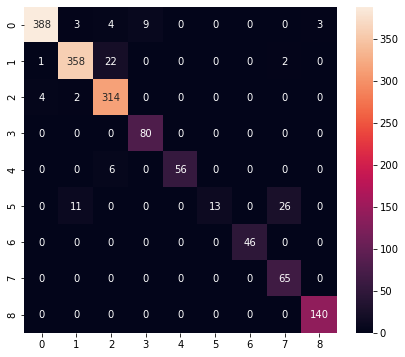

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       407
           1       0.96      0.93      0.95       383
           2       0.91      0.98      0.94       320
           3       0.90      1.00      0.95        80
           4       1.00      0.90      0.95        62
           5       1.00      0.26      0.41        50
           6       1.00      1.00      1.00        46
           7       0.70      1.00      0.82        65
           8       0.98      1.00      0.99       140

    accuracy                           0.94      1553
   macro avg       0.94      0.89      0.89      1553
weighted avg       0.95      0.94      0.93      1553



In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [64]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [65]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpxojsac1p\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpxojsac1p\assets


6792

# 推論テスト

In [66]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [67]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [68]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [69]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [70]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.5203444e-02 5.0011653e-02 9.0428489e-01 6.1025275e-06 3.8645638e-04
 2.8783626e-05 1.4447226e-05 6.1803771e-06 5.7998706e-05]
2
